In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#import Kmeans from cluster
from sklearn.cluster import KMeans

#import scaler, which can be used for scaling data/fit
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income(Rs)
0,Ram,27,70000
1,Manish,29,90000
2,Mohan,29,61000
3,Ira,28,60000
4,Katrina,42,150000


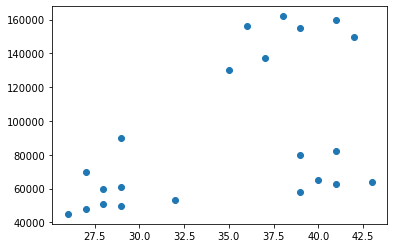

In [3]:
plt.scatter(df['Age'], df['Income(Rs)'])

# Creating k-means cluster

In [4]:
#create kMeans model (i.e. object) with 3 clusters
#use default parameters for KMeans() with 3 clusters
# Beacuse we can see in scatter plot that, the data points are in 3 groups.
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
#predict & predict dataframe excluding name column. Name is string it can not be used for prediction

#it creates 3 clusters with y_predicted values as --> 0, 1, 2
y_predicted = km.fit_predict(df[['Age', 'Income(Rs)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
#append y_predicted as column in the dataframe to know how clusters are created.
#plot so that we can see clusters
df['cluster'] = y_predicted
df.head()

,Name,Age,Income(Rs),cluster
0,Ram,27,70000,0
1,Manish,29,90000,0
2,Mohan,29,61000,2
3,Ira,28,60000,2
4,Katrina,42,150000,1


Text(0, 0.5, 'Income(Rs)')

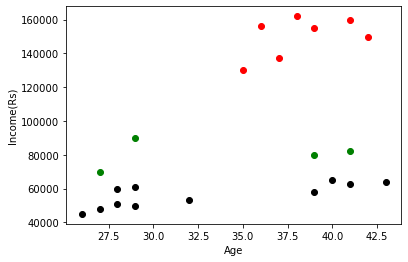

In [10]:
#create three different dataframes: df1, df2, df3 and then plot
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

#plot the three dataframes
plt.scatter(df1['Age'], df1['Income(Rs)'], color='green')
plt.scatter(df2['Age'], df2['Income(Rs)'], color='red')
plt.scatter(df3['Age'], df3['Income(Rs)'], color='black')

#put label
plt.xlabel('Age')
plt.ylabel('Income(Rs)')
#plt.legend()

## in above plot, clusters are not properly formed, green and black are mixed.
## SO, do preprocessing so that scaling happens. Use minMax scaler

In [13]:
scaler = MinMaxScaler()

#do fit and transform 'Income(Rs)'
scaler.fit(df[['Income(Rs)']])#or just use  scale scaler.fit_transform(df[['Income(Rs)'] ])
df['Income(Rs)'] = scaler.transform(df[['Income(Rs)'] ])    

#do fit and transform 'Age'
scaler.fit(df[['Age']])                           #or just use  scale scaler.fit_transform(df[['Age'] ])
df['Age'] = scaler.transform(df[['Age'] ])    

df.head()

,Name,Age,Income(Rs),cluster
0,Ram,0.058824,0.213675,0
1,Manish,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ira,0.117647,0.128205,2
4,Katrina,0.941176,0.897436,1


In [14]:
#create model KMeans after using scaled data
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income(Rs)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
# update cluster column as after fitting age and income
df['cluster'] = y_predicted
df.head()

,Name,Age,Income(Rs),cluster
0,Ram,0.058824,0.213675,0
1,Manish,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ira,0.117647,0.128205,0
4,Katrina,0.941176,0.897436,1


Text(0, 0.5, 'Income(Rs)')

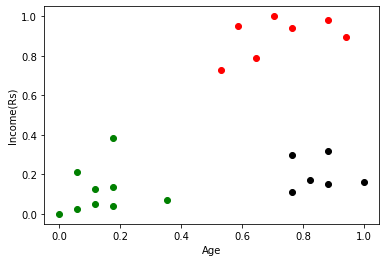

In [16]:
#create three different dataframes: df1, df2, df3 and then plot
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

#plot the three dataframes
plt.scatter(df1['Age'], df1['Income(Rs)'], color='green')
plt.scatter(df2['Age'], df2['Income(Rs)'], color='red')
plt.scatter(df3['Age'], df3['Income(Rs)'], color='black')

#put label
plt.xlabel('Age')
plt.ylabel('Income(Rs)')

# centroid (i.e cluster centers)

In [17]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

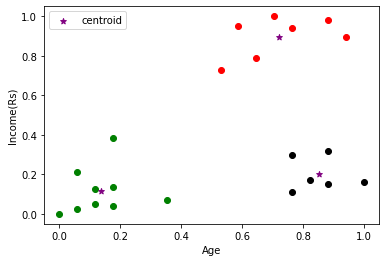

In [18]:
#plot center clusters
#so iterate on all rows --> plot 0th column and 1st column

#plot the three dataframes
plt.scatter(df1['Age'], df1['Income(Rs)'], color='green')
plt.scatter(df2['Age'], df2['Income(Rs)'], color='red')
plt.scatter(df3['Age'], df3['Income(Rs)'], color='black')

# centroid
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*',label='centroid')

#put label
plt.xlabel('Age')
plt.ylabel('Income(Rs)')
plt.legend()

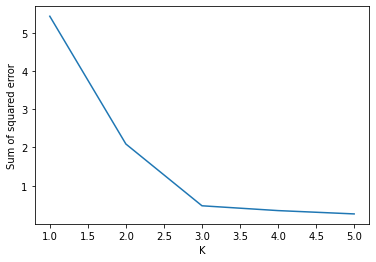

In [22]:
#plot using elbow plot when we have more columns than 2..
k_rng = range(1, 6)
sse =[]              #sse--> sum of squared error

for k in k_rng: 
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income(Rs)']])
    sse.append(km.inertia_)

#plot sse ...which is elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
# we can see 3 is the best no of cluster (3 denote the elbow)